PROJECT BY:SHAFINA CHARANIA

## **Marketing Campaign For Banking Products**

### **PROBLEM STATEMENT**
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


## **Objective:**
The classification goal is to predict the likelihood of a liability customer buying personal loans.



## **Steps and tasks:**
Import the datasets and libraries, check datatype, statistical summary, shape, null values etc
Check if you need to clean the data for any of the variables
EDA: Study the data distribution in each attribute and target variable, share your findings. ● Number of unique in each column? ● Number of people with zero mortgage? ● Number of people with zero credit card spending per month? ● Value counts of all categorical columns. ● Univariate and Bivariate analysis
Apply necessary transformations for the feature variables
Normalise your data and split the data into training and test set in the ratio of 70:30 respectively
Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.
Print all the metrics related for evaluating the model performance
Build various other classification algorithms and compare their performance
Give a business understanding of your model

## **1.Importing the required libraries and the dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn.preprocessing import PowerTransformer


In [ ]:
from google.colab import files

uploaded = files.upload()
da=pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")


Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (3).csv


## 1.1 Checking datatype, statistical summary, shape, null values **etc*

In [ ]:
da.head()
da.shape  #It gives number of rows and columns
da.info

<bound method DataFrame.info of         ID  Age  Experience  ...  CD Account  Online  CreditCard
0        1   25           1  ...           0       0           0
1        2   45          19  ...           0       0           0
2        3   39          15  ...           0       0           0
3        4   35           9  ...           0       0           0
4        5   35           8  ...           0       0           1
...    ...  ...         ...  ...         ...     ...         ...
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5000 rows x 14 columns]>

In [ ]:
da.describe()  #It gives all the statistical measures of data like the mean ,minimum value,etc

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## 2. Dropping the irrelevant *Columns* 




In [ ]:
experience=da['Experience']
age=da['Age']
correlation=experience.corr(age)
correlation
#(it says that both age and experience are correlated )

0.9942148569683321

In [ ]:
da=da.drop(['ID','Experience'],axis=1)
da.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#for displaying null values
da.isnull().sum()

Age                   0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
da.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   ZIP Code            5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [ ]:
da.describe()


,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#last 5 rows
da.tail(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0
4999,28,83,92612,3,0.8,1,0,0,0,0,1,1


3. EXPLORATORY DATA ANALYSIS

Now looking into the nature of Variables:

1) ID: We have already set this as our Index column and it is already omitted as it has no relation with the personal loan variable.

2) Age: The age of customer is a numerical data.

3) Income: Annual Income of customers is a numerical type of data. It is the variable which is important to predict the value of target variable that whether the person will get loan or not.

4) ZIP Code: address of the Customers.It is not an important variable while determining the target variable.

5) Family: size of family of the customer.

6) CC Avg: Credit cards spending per month ($000). This is a Numerical data type.

7) Education: This is a Nominal categorical data type.

8) Mortgage: It is Numerical data type which gives the value of House mortgage. 9) Personal Load: This is our feature to be predicted. The data in the column is categorical and nominal.

10) Securities Account: This Nominal Categorical data type indicates if the Customer has an account in the bank.

11) CD Account: This is one of our Categorical data columns.

12) Online: This Nominal Categorical data type tells if the Customer has an Online Account.

13) Credit Card: This Nominal Categotical data value tells about possession of Credit card by the Customer.

so, we can broadly divide our Dataset into variables:

A) Numerical: ['age', 'experience', 'income', 'zip code', 'family', 'ccavg', education', 'mortgage']

B) Categorical: ['personal loan', 'securities account', 'cd account', 'online', 'creditcard']

In [ ]:
da.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [ ]:
da.drop("ZIP Code",axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


Now, find the value counts of all the categorical columns.

The Categorical columns are: ['Personal loan', 'Securities account', 'Cd account', 'Online', 'Creditcard',"Education","Family"]

In [ ]:
z=da.Mortgage
sum(z)



282494

In [ ]:
x=da.CCAvg==0
sum(x)

106

In [ ]:
y=da.CreditCard==1
sum(y)

1470

In [ ]:
da.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
da.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
data_top = da.head() 
data_top

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
da.columns= [c.replace(' ', '_') for c in da.columns]

In [ ]:
da.columns

Index(['Age', 'Income', 'ZIP_Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard'],
      dtype='object')

In [ ]:
da.CD_Account.value_counts()

0    4698
1     302
Name: CD_Account, dtype: int64

In [ ]:
da['Securities_Account']

0       1
1       1
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Securities_Account, Length: 5000, dtype: int64

In [ ]:
da.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
da.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

# **UNIVARIATE ANALYSIS**





In [ ]:
#PLOTS
#UNIVARIATE


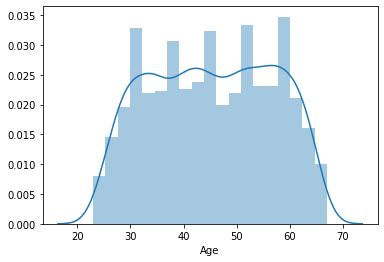

In [ ]:
sn.distplot(da.Age)

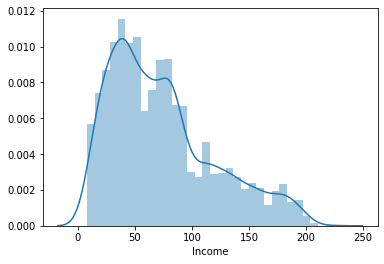

In [ ]:
sn.distplot(da.Income)

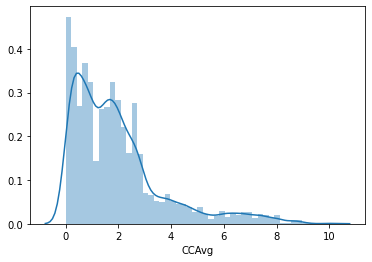

In [ ]:
sn.distplot(da.CCAvg)

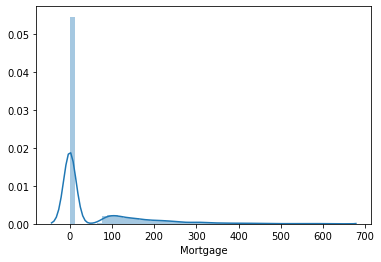

In [ ]:
sn.distplot(da.Mortgage)

In [ ]:
#BIVARIATE

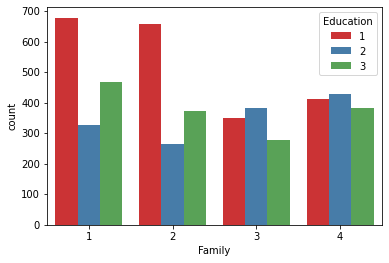

In [ ]:
sn.countplot(x='Family',data=da,hue='Education',palette='Set1')

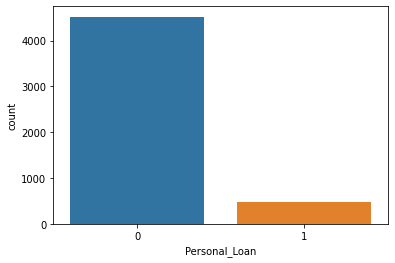

In [ ]:
sn.countplot(da["Personal_Loan"])  
#It shows that there are 4520 people who will not get loan while there are only 480 people who will get loan

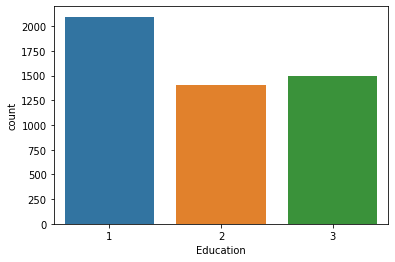

In [ ]:
sn.countplot(da.Education);

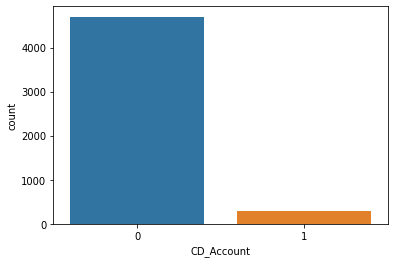

In [ ]:
sn.countplot(da["CD_Account"])

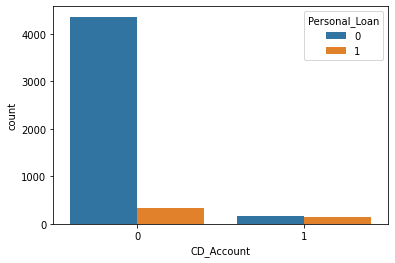

In [ ]:
sn.countplot(x='CD_Account',data=da,hue='Personal_Loan')

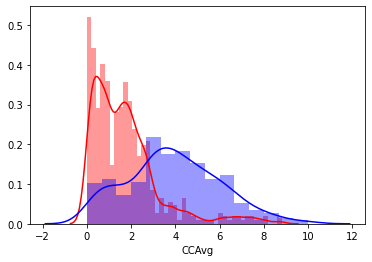

In [ ]:
sn.distplot( da[da.Personal_Loan == 0]['CCAvg'], color = 'r')
sn.distplot( da[da.Personal_Loan == 1]['CCAvg'], color = 'b')

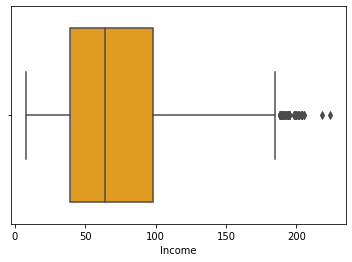

In [ ]:
sn.boxplot(da["Income"],color="orange")

# **BIVARIATE ANALYSIS**

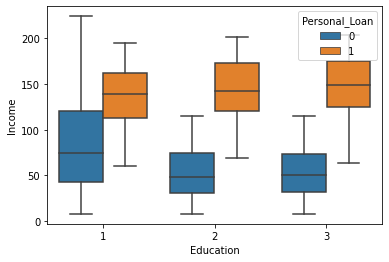

In [ ]:
#Influence of income and education on personal loan
sn.boxplot(x='Education',y='Income',hue='Personal_Loan',data=da)

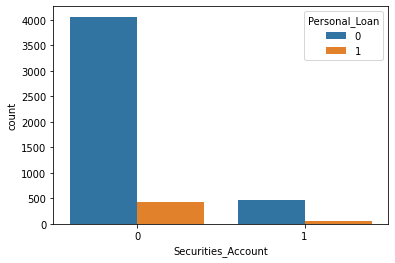

In [ ]:
# Majority of people having Security Account don't have Personal loan
sn.countplot(x='Securities_Account', hue='Personal_Loan',data=da);

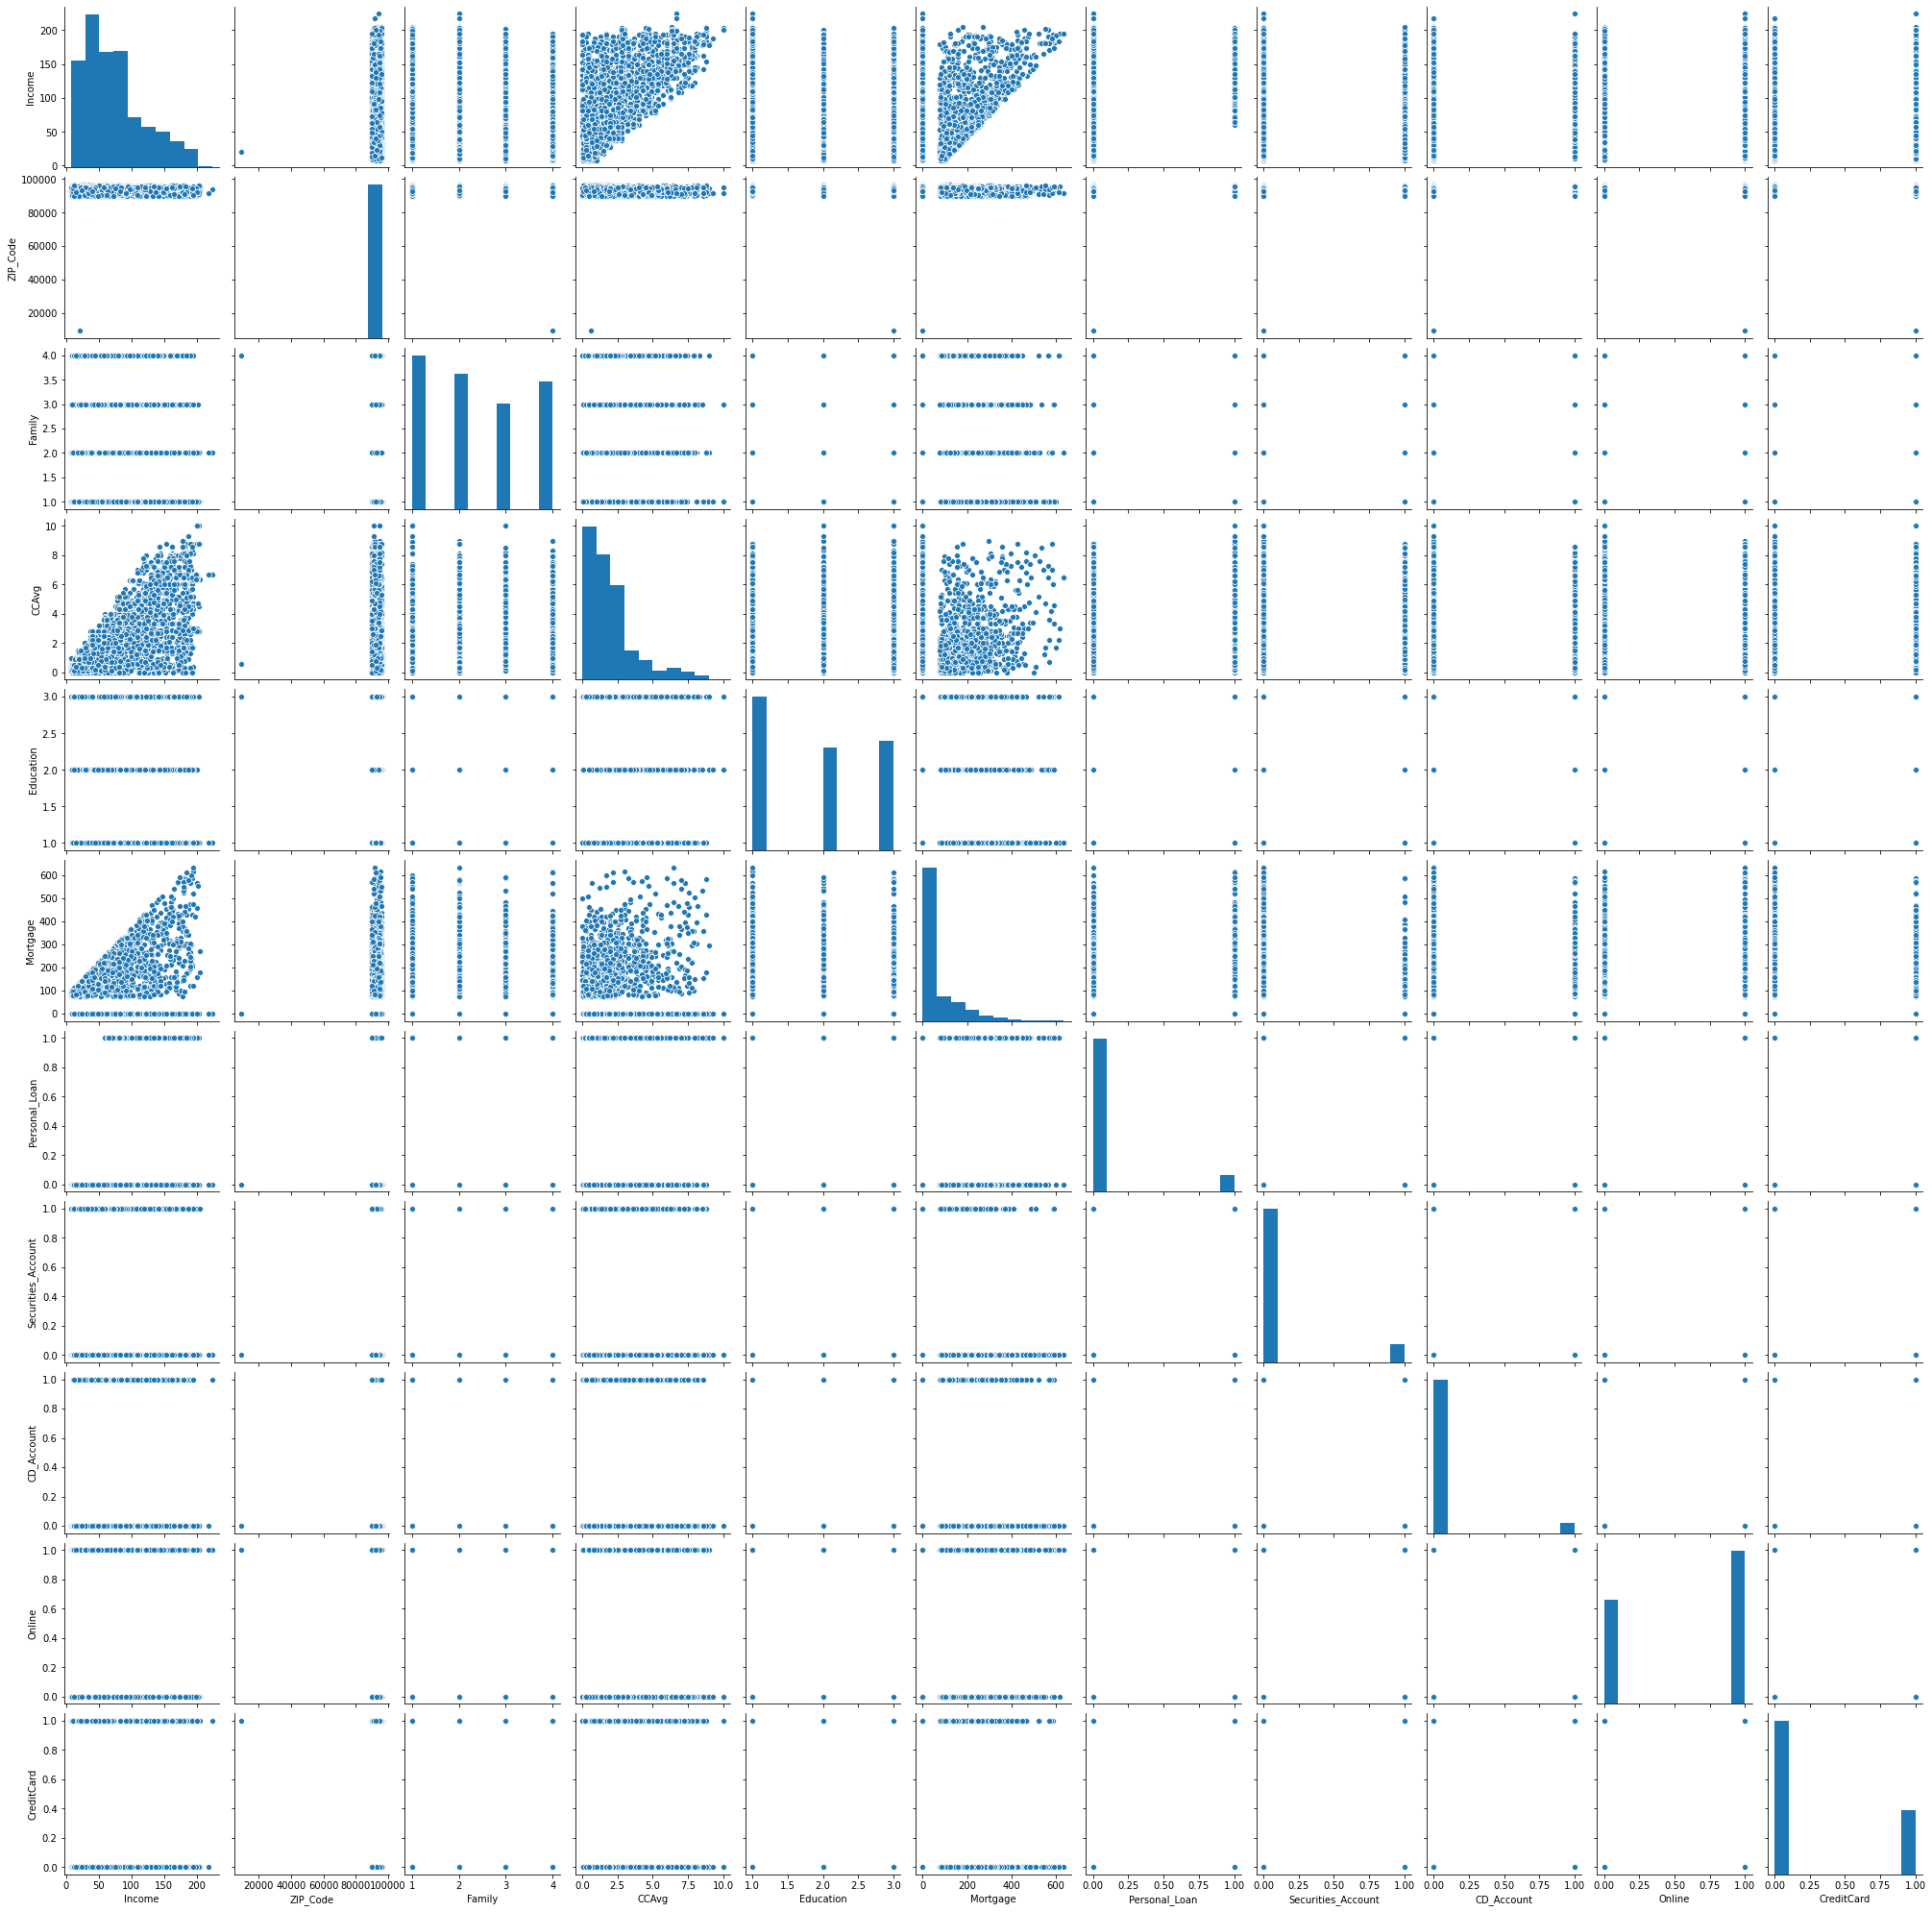

In [ ]:
sn.pairplot(da.iloc[:,1:])

In [ ]:
#heat map

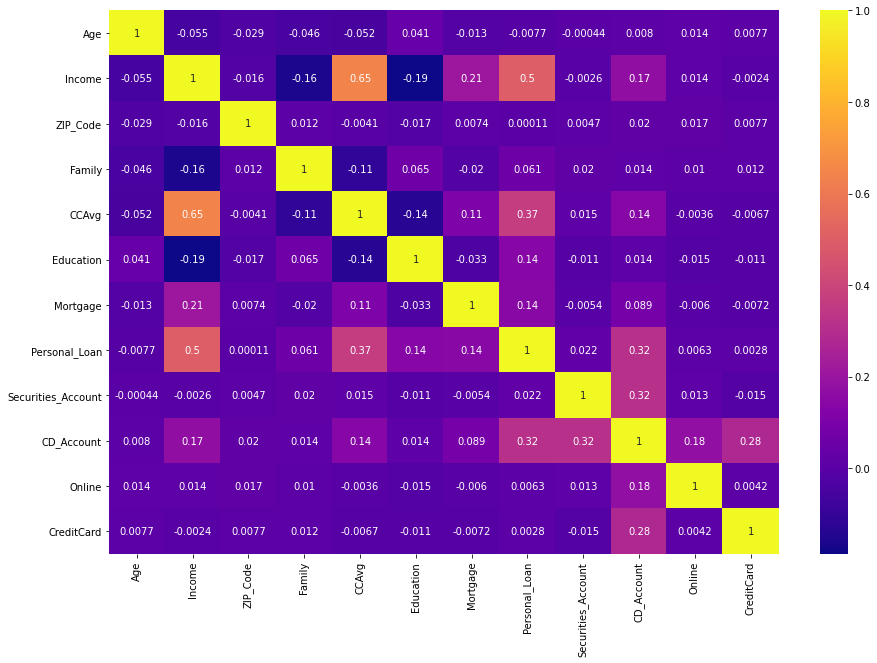

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
sn.heatmap(da.corr(),cmap='plasma',annot=True);

TRANSFORMING DATA


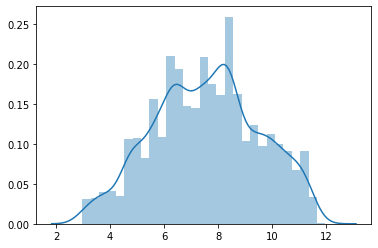

In [ ]:
pt = PowerTransformer(method="yeo-johnson",standardize=False)
data = da
pt.fit(da["Income"].values.reshape(-1,1))
temp=pt.transform(da["Income"].values.reshape(-1,1))
sn.distplot(temp);


# **4. TRANSFORMATION OF FEATURE VARIABLE**

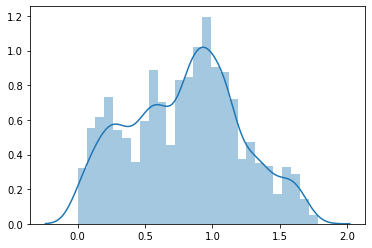

In [ ]:
pt = PowerTransformer(method="yeo-johnson",standardize=False)

pt.fit(da["CCAvg"].values.reshape(-1,1))
temp=pt.transform(da["CCAvg"].values.reshape(-1,1))
sn.distplot(temp);


In [ ]:
da["Mortgage_int"]=pd.cut(da["Mortgage"],
                          bins=[0,100,200,300,400,500,600,700],
                          labels=[0,1,2,3,4,5,6],
                          include_lowest=True)
da.drop("Mortgage",axis=1,inplace=True)


In [ ]:
da.head()

,Age,Income,ZIP_Code,Family,CCAvg,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Mortgage_int
0,25,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1,0


In [ ]:
da.drop("ZIP_Code",axis=1,inplace=True)

In [ ]:
da.head()

,Age,Income,Family,CCAvg,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Mortgage_int
0,25,49,4,1.6,1,0,1,0,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1,0


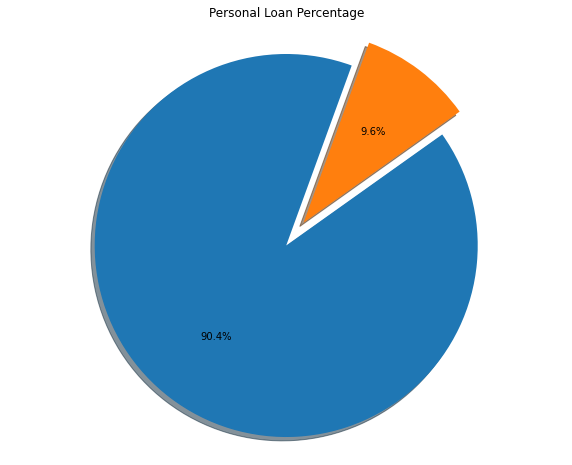

In [ ]:
tempDF=pd.DataFrame(da["Personal_Loan"].value_counts()).reset_index()
tempDF.columns=["Labels","Personal_Loan"]
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(tempDF["Personal_Loan"],explode=explode,autopct='%1.1f%%',
        shadow=True,startangle=70)
ax1.axis('equal')   #Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Personal Loan Percentage")
plt.show()

NORMALIZING DATA

In [ ]:
#Normalize the data attributes for the Iris datasetPython
# Normalize the data attributes for the Iris dataset.
from sklearn.datasets import load_iris
from sklearn import preprocessing
# load the iris dataset
iris = load_iris()
print(iris.data.shape)
# separate the data from the target attributes
X = iris.data
y = iris.target
# normalize the data attributes
normalized_X = preprocessing.normalize(X)



(150, 4)


In [ ]:
data_X=da.loc[:,da.columns != "Personal_Loan"]
data_Y=da[["Personal_Loan"]]

# **5. Splitting the data using stratified sampling**

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y,test_Y =train_test_split(data_X,data_Y,test_size=0.3,stratify=data_Y,random_state=0)
train_X.reset_index(drop=True, inplace=True);
test_X.reset_index(drop=True, inplace=True);
train_Y.reset_index(drop=True, inplace=True);
test_Y.reset_index(drop=True, inplace=True);

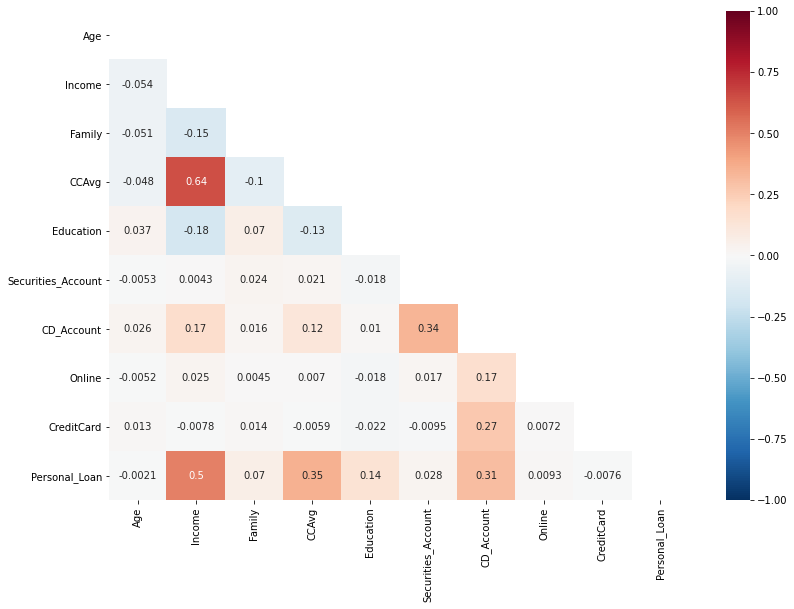

In [ ]:
corr_matrix = pd.concat([train_X, train_Y], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(13,9))
sn.heatmap(corr_matrix,annot=True,vmin=-1,vmax=1,center=0, mask=mask,cmap="RdBu_r");

In [ ]:
train_X.head()

,Age,Income,Family,CCAvg,Education,Securities_Account,CD_Account,Online,CreditCard,Mortgage_int
0,51,24,3,0.4,1,0,0,1,1,0
1,64,35,1,1.5,2,1,0,0,0,0
2,52,31,4,1.8,1,0,0,1,1,0
3,32,20,1,0.5,3,0,0,1,0,1
4,62,54,1,0.8,1,1,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
train_X,test_X,train_Y,test_Y = train_test_split(data_X,data_Y,test_size = 0.3, random_state = 0,stratify = data_Y)
scx.fit_transform(train_X)
scx.transform(test_X)


array([[-0.97265109,  2.31851937, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.85873161,  0.16296952, -0.34389746, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.24827071,  1.18631137, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       ...,
       [ 0.68431421, -0.92569202, -0.34389746, ..., -1.19253735,
         1.52960605,  0.68340496],
       [-0.97265109, -0.53377386, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [-0.01335539, -0.33781479,  0.52957214, ...,  0.83854816,
        -0.65376311, -0.47490853]])

PUTTING THE DATA INTO MACHINE LEARNING MODELS

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score, roc_auc_score,accuracy_score,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

np_train_X=train_X.values
np_train_Y=train_Y.values
np_test_X=test_X.values
np_test_Y=test_Y.values


In [ ]:
cls_1= LogisticRegression(random_state=0)
cls_2= DecisionTreeClassifier(random_state=0,max_depth=8)
cls_3= RandomForestClassifier(random_state=0,n_estimators=500,max_depth=8)

cls_1.fit(np_train_X,np_train_Y.ravel())
pred_1_test_X=cls_1.predict(np_test_X)
pred_1_train_X=cls_1.predict(np_train_X)
acc_1_train_X= accuracy_score(np_train_Y, pred_1_train_X)
acc_1_test_X= accuracy_score(np_test_Y, pred_1_test_X)
print("Base learner 1 accuracy on np_train_x: {:.4f}".format(acc_1_train_X))
print("Base learner 1 accuracy on np_test_x: {:.4f}".format(acc_1_test_X))

cls_2.fit(np_train_X,np_train_Y.ravel())
pred_2_test_X=cls_2.predict(np_test_X)
pred_2_train_X=cls_2.predict(np_train_X)
acc_2_train_X= accuracy_score(np_train_Y, pred_2_train_X)
acc_2_test_X= accuracy_score(np_test_Y, pred_2_test_X)
print("Base learner 2 accuracy on np_train_x: {:.4f}".format(acc_2_train_X))
print("Base learner 2 accuracy on np_test_x: {:.4f}".format(acc_2_test_X))


cls_3.fit(np_train_X,np_train_Y.ravel())
pred_3_test_X=cls_3.predict(np_test_X)
pred_3_train_X=cls_3.predict(np_train_X)
acc_3_train_X= accuracy_score(np_train_Y, pred_3_train_X)
acc_3_test_X= accuracy_score(np_test_Y, pred_3_test_X)
print("Base learner 3 accuracy on np_train_x: {:.4f}".format(acc_3_train_X))
print("Base learner 3 accuracy on np_test_x: {:.4f}".format(acc_3_test_X))



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Base learner 1 accuracy on np_train_x: 0.9497
Base learner 1 accuracy on np_test_x: 0.9453
Base learner 2 accuracy on np_train_x: 0.9957
Base learner 2 accuracy on np_test_x: 0.9800
Base learner 3 accuracy on np_train_x: 0.9949
Base learner 3 accuracy on np_test_x: 0.9873


In [ ]:
def draw_cm(actual, predicted):
  cm=confusion_matrix(actual,predicted)
  sn.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
  plt.ylabel('Obeserved')
  plt.xlabel('Predicted')
  plt.show()

In [ ]:
np_test_Y.shape

(1500, 1)

Confusion Matrix


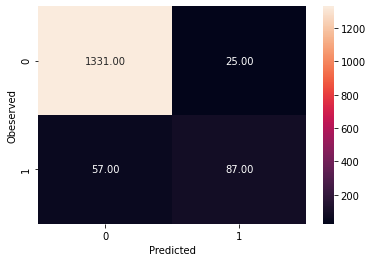

None


In [ ]:
print('Confusion Matrix')
print(draw_cm(np_test_Y,pred_1_test_X.reshape(-1,1)))

In [ ]:
print("Recall: ", recall_score(np_test_Y,pred_1_test_X))
print()
print("Precision: ",precision_score(np_test_Y,pred_1_test_X))
print()
print("F1 score: ",f1_score(np_test_Y,pred_1_test_X))
print()
print("ROC Auc Score: ",roc_auc_score(np_test_Y,pred_1_test_X))

Recall:  0.6041666666666666

Precision:  0.7767857142857143

F1 score:  0.6796875

ROC Auc Score:  0.7928650442477875


Confusion Matrix


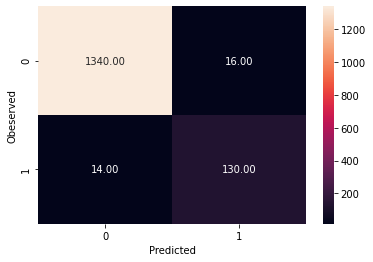

None


In [ ]:
print('Confusion Matrix')
print(draw_cm(np_test_Y,pred_2_test_X))

In [ ]:
print("Recall: ", recall_score(np_test_Y,pred_2_test_X))
print()
print("Precision: ",precision_score(np_test_Y,pred_2_test_X))
print()
print("F1 score: ",f1_score(np_test_Y,pred_2_test_X))
print()
print("ROC Auc Score: ",roc_auc_score(np_test_Y,pred_2_test_X))

Recall:  0.9027777777777778

Precision:  0.8904109589041096

F1 score:  0.896551724137931

ROC Auc Score:  0.9454891838741396


Confusion Matrix


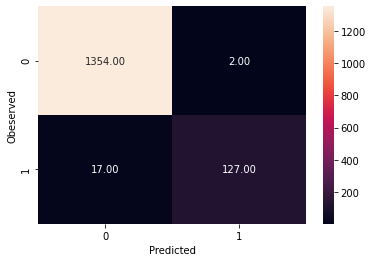

None


In [ ]:
print('Confusion Matrix')
print(draw_cm(np_test_Y,pred_3_test_X))

In [ ]:
print("Recall: ", recall_score(np_test_Y,pred_3_test_X))
print()
print("Precision: ",precision_score(np_test_Y,pred_3_test_X))
print()
print("F1 score: ",f1_score(np_test_Y,pred_3_test_X))
print()
print("ROC Auc Score: ",roc_auc_score(np_test_Y,pred_3_test_X))

Recall:  0.8819444444444444

Precision:  0.9844961240310077

F1 score:  0.9304029304029303

ROC Auc Score:  0.9402347590953786


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred = neigh.predict(test_X)
import sklearn.metrics as metrics

In [ ]:
print("MAE:",metrics.mean_absolute_error(test_Y,y_pred))
print("R2 score:",metrics.r2_score(test_Y,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(test_Y,y_pred))

MAE: 0.07266666666666667
R2 score: 0.16267207472959677
Accuracy score for test data 0.9273333333333333


In [ ]:
print("Accuracy score for train data",metrics.accuracy_score(train_Y)

SyntaxError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,y_pred))

In [ ]:
X=data.drop(['Personal_Loan'],axis=1)
y=data.pop('Personal_Loan')

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

STEP 9: GIVE A BUSSINESS UNDERSTANDING OF THE MODEL
FINAL CONCLUSION

SO,WE HAVE FINALLY REACHED TO THE END OF THE PROJECT IN WHICH THERE WERE SOME OF THE VARIABLES LIKE THE NUMERICAL VARIABLES AND CATEGORICAL VARIABLES WHICH AFFECT THE PARAMETER PERSONAL LOAN AND THE AIM OF THE PROJECT WAS TO PREDICT WHETHER THE PERSON WILL GET LOAN OR NOT AND IT DEPENDS ON WHICH PARAMETERS.

THE INFERENCES ARE THE FOLLOWING:

By performing the EDA we get to explore our data and find out that there are 3462 people with 0 mortage and Number of people with zero credit card spending per month is 106. Then we perform the univariate and bivariate analysis and we found out the relationship between different variables.Then we found out that the variable income is highly skewed so we perform transformation on the income feature variable and then we made it's distribution normal. We also print some metrics like the confusion metrics.

Then finally we perform logistic regression in order to predict the accuracy and the training and the testing results. The results are as follows.

 KNN=Accuracy score for test data 0.9273333333333333


Base learner 1 accuracy on np_train_x: 0.9497
Base learner 1 accuracy on np_test_x: 0.9453
Base learner 2 accuracy on np_train_x: 0.9957
Base learner 2 accuracy on np_test_x: 0.9800
Base learner 3 accuracy on np_train_x: 0.9949
Base learner 3 accuracy on np_test_x: 0.9873

cls_1 is  LogisticRegression ,
cls_2 is DecisionTreeClassifier,
cls_3 is RandomForestClassifier,





SO, FROM ALL THESE MODELS WE PREDICTED OUT THAT RANDOM FOREST IS THE BEST CLASSIFICATION MODEL WHICH GIVES THE BEST RESULTS AND GOOD ACCURACY.

THANK YOU